# Evapotranspiration after Oudin et al. (2005)

Content (jump to): [Parameters](#ID1), [Calculation of ETP](#ID2)

## Oudin Formula

$$ETP = E_r  \frac{T_a+5}{100} [\frac{mm}{d}]$$

ETP...Evapotranspiration [mm/d] <br>
$E_r$...Evaporation due to the extraterrestrial radiation [mm/d] <br>
$T_a$...Average Temperature [°C]


In [9]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# load the data
data = pd.read_excel('DATA\ETP_data.xlsx', index_col='datum', parse_dates=True)

<a id='ID1'></a>
## Parameters

### 1. Average temperture

In [11]:
### the data is providet as excel sheet

# load data
T_avg = data['T_14'].values

# print the first 10 values
print (T_avg[0:10])

[12.4 10.1  9.4 10.4 12.4  4.5  1.1  4.1  6.9 10.1]


### 2. Evaporation due to the extraterrestrial radiation

$$ E_r = \frac{R_e}{\lambda  \rho} [\frac{mm}{d}] $$

$E_r$...Evaporation due to the extraterrestrial radiation [mm/d] <br>
$R_e$...extraterrestrial radiation [MJ/(mm2*d)] <br>
$\lambda$...evaporation heat of water (= 2,45 [MJ/k]) <br>
$\rho$...density of water ( = 1 [kg/l]) <br>

In [12]:
# calculate the evaporation due to the extraterrestrial radiation in mm/d for Graz

## lat...latitude of location (Graz) in radiants
lat = np.pi / 180 *47

## doy...Day of the year from the oudin.xlsx
doy = data.index.dayofyear

## variables dependent on the doy
dr = 1 + 0.033 * np.cos(2 * np.pi * doy / 365)  # inverse relative change in distance between Earth and Sun
delta = 0.409 * np.sin(2 * np.pi * doy / 365 - 1.39) # declination of the sun
omega_s = np.arccos(-np.tan(lat) * np.tan(delta)) # sunset hour angle

## Therefrom we calculate the extraterrestrial radiation in [MJ/m2/d]: Re
Re = 24 * 60 / np.pi * 0.082 * dr * (omega_s * np.sin(lat) * np.sin(delta) + np.cos(lat) * np.cos(delta) * np.sin(omega_s))

## And finally the evaporation due to the extraterrestrial radiation in [mm/d]
E_r = Re / 2.45

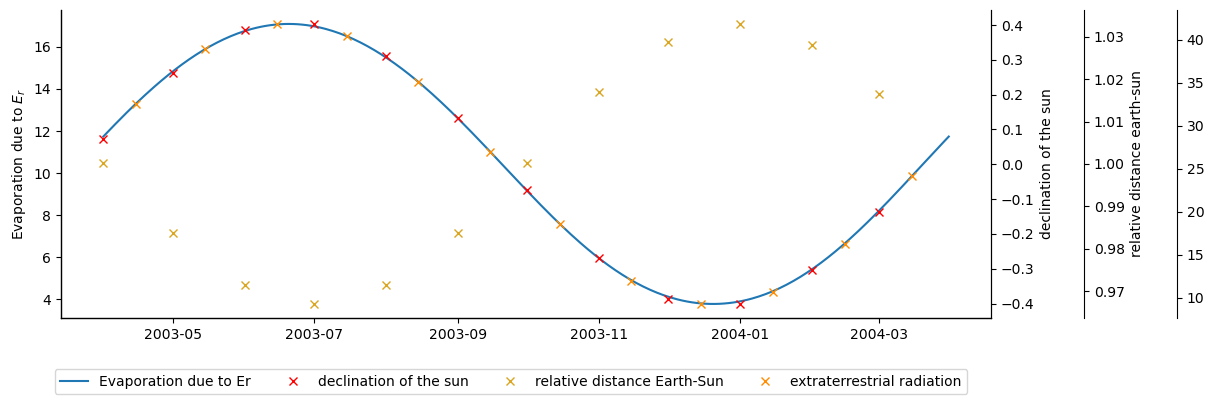

In [13]:
# To earn a better understanding of the data delta, dr and Re are plotet against the doy

## plot the declination
fig, ax1 = plt.subplots(1,1,figsize=(12,4))

# plot E_r
ax1.plot(data.index, E_r, label='Evaporation due to Er')
ax1.set_ylabel(r'Evaporation due to $E_{r}$')

## plot the declination of the sun
ax11 = ax1.twinx()
ax11.plot(data.index[data.index.day==1], delta[data.index.day==1], label='declination of the sun', ls='',marker='x', color='red')
ax11.set_ylabel('declination of the sun')

## plot relative distance earth-sun
ax12 = ax1.twinx()
ax12.spines.right.set_position(("axes", 1.1))
ax12.plot(data.index[data.index.day==1], dr[data.index.day==1], color='goldenrod',ls='',marker='x', label='relative distance Earth-Sun')
ax12.set_ylabel('relative distance earth-sun')

## plot the extraterrestrial radiation
ax13 = ax1.twinx()
ax13.spines.right.set_position(("axes", 1.2))
ax13.plot(data.index[data.index.day==15], Re[data.index.day==15], color= 'darkorange', ls='',marker='x', label='extraterrestrial radiation')
ax13.set_label('extraterrestrial radiation')


fig.legend(bbox_to_anchor=(0.5, 0.0), loc="upper center", fancybox=True, ncol=4)
ax1.spines['top'].set_visible(False)
ax11.spines['top'].set_visible(False)
ax12.spines['top'].set_visible(False)
ax13.spines['top'].set_visible(False)

#Problem: ax13: label not displaying


<a id='ID1'></a>
## Calculation of ETP

In [14]:
# funktion for calculating the evapotranspiration after Oudin et al. (2005)
def ETP_oudin(E_r, Temp_avg):
    """
    This function calculates the evapotranspiration according to the Oudin method
    Parameters
    ----------
    E_r : float
        Extraterrestrial radiation in mm/day
    Temp_avg : float
        Average temperature in degrees Celsius
    Returns
    -------
    ETP : float
        Evapotranspiration in mm/day
    """

    if E_r * (Temp_avg + 5) / 100 > 0:
        ETP_Oudin = E_r * (Temp_avg + 5) / 100

    else:
        ETP_Oudin = 0

    return ETP_Oudin

In [15]:
# Now that all the data is available the ETP can be calculated 
ETP_Oudin = np.zeros(len(data))
for i in np.arange(0, len(data)):
    ETP_Oudin[i] = ETP_oudin(E_r[i], data['T (°C)'].values[i])

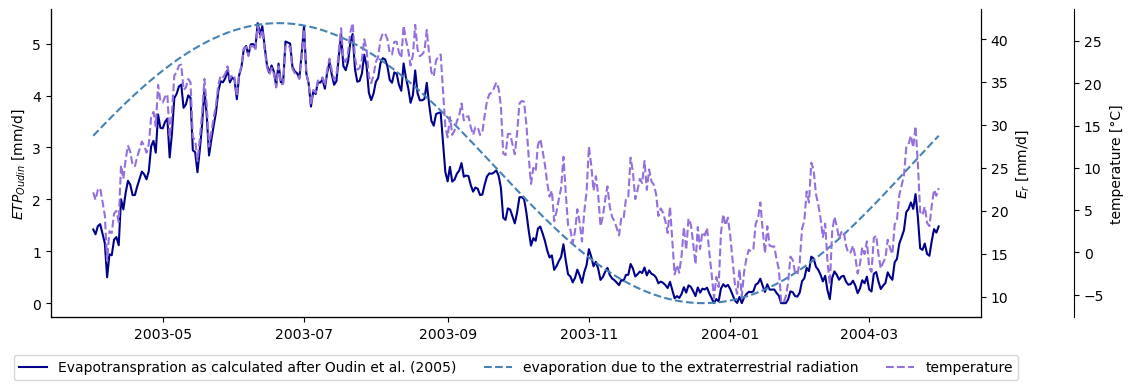

In [16]:
# ...and plottet
fig, ax = plt.subplots(figsize=(12,4))

## plot the ETP
l1=ax.plot(data.index, ETP_Oudin, color='darkblue', label='Evapotranspration as calculated after Oudin et al. (2005)')
ax.set_ylabel('$ETP_{Oudin}$ [mm/d]')
## plot the extraterrestrial radiation
ax2=ax.twinx()
l2=ax2.plot(data.index, Re, color='steelblue', label='evaporation due to the extraterrestrial radiation', ls='--')
ax2.set_ylabel(r'$E_{r}$ [mm/d]')
## plot temperature
ax3=ax.twinx()
ax3.spines.right.set_position(("axes", 1.1))
l3=ax3.plot(data.index, data['T (°C)'], color='mediumpurple', label='temperature', ls='--')
ax3.set_ylabel('temperature [°C]')


ax.legend(handles = l1+l2+l3, bbox_to_anchor=(0.5, -0.1), loc="upper center", fancybox=True, ncol=4)
ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax3.spines['top'].set_visible(False)